In [2]:
# CarveMe
import os
import subprocess
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [189]:
# visualize MIP and MRO
p = './faa/All_tsv.csv'
data = pd.read_csv(p,index_col=0)
data

,community,medium,size,mip,mro,mip_den
GCA_000987395.1_GCF_001050535.1_global,all,complete,3,1,0.727273,0.333333
GCA_002455435.1_GCF_001046875.1_global,all,complete,3,2,0.790698,0.666667
GCA_002345025.1_GCF_009707485.1_global,all,complete,3,2,0.744186,0.666667
GCA_000585055.1_GCF_001050535.1_global,all,complete,3,0,0.738095,0.000000
GCA_003535635.1_GCF_009707485.1_global,all,complete,3,3,0.693878,1.000000
...,...,...,...,...,...,...
GCA_005524045.1_GCF_009184895.1_global,all,complete,3,1,0.804348,0.333333
GCA_009467855.1_GCF_001428065.1_global,all,complete,3,2,0.720930,0.666667
GCA_003487685.1_GCF_001428065.1_global,all,complete,3,3,0.739130,1.000000
GCA_003487685.1_GCF_001050535.1_global,all,complete,3,3,0.695652,1.000000


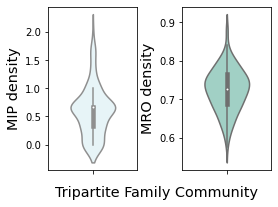

In [365]:
fig, ax = plt.subplots(1,2,figsize=(4,3))
plt.subplots_adjust(wspace=.5)
sns.violinplot(data=data["mip_den"],ax=ax[0],color='#e5f5f9',width=0.5)
sns.violinplot(data=data["mro"],ax=ax[1],color="#99d8c9",width=.5)
ax[0].set_ylabel("MIP density",fontsize='x-large')
ax[1].set_ylabel("MRO density",fontsize='x-large')
ax[0].set_xticklabels([''])
ax[1].set_xticklabels([''])
fig.text(0.5,0,"Tripartite Family Community",fontsize='x-large',ha='center')
fig.savefig("total.png",dpi=600,bbox_inches='tight')

In [273]:
# visualize MIP and MRO for increased community size
p2 = './faa/increase_tsv.csv'
data2 = pd.read_csv(p2,index_col=0)
mean = data2.groupby(by='size').mean()
std = data2.groupby(by='size').std()
x = mean.index.to_series().to_numpy()
y1 = mean["mip_den"].to_numpy()
yerr1 = std["mip_den"].to_numpy()
y2 = mean["mro"].to_numpy()
yerr2 = std["mro"].to_numpy()

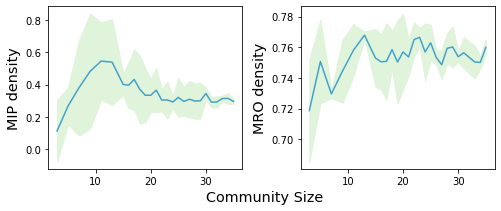

In [289]:
fig2, ax2 = plt.subplots(1,2,figsize=(8,3))
plt.subplots_adjust(wspace=.3)
ax2[0].plot(x,y1,c='#43a2ca')
ax2[0].fill_between(x,y1-yerr1,y1+yerr1,color='#e0f3db')
ax2[1].plot(x,y2,c='#43a2ca')
ax2[1].fill_between(x,y2-yerr2,y2+yerr2,color='#e0f3db')
ax2[0].set_ylabel("MIP density",fontsize='x-large')
ax2[1].set_ylabel("MRO density",fontsize='x-large')
fig2.text(0.5,-0.02,"Community Size",fontsize='x-large',ha='center')
fig2.savefig("increase.png",dpi=600,bbox_inches='tight')

In [362]:
model.reactions.get_by_id("adn_e")

Reaction identifier,EX_6atha_e
Name,R_EX_6atha_e
Memory address,0x7fda6413ddc0
Stoichiometry,6atha_e <=> 6 acetylthiohexanoic acid <=>
GPR,
Lower bound,-1000.0
Upper bound,1000.0


In [398]:
model.metabolites.get_by_id("meoh_e")

Metabolite identifier,meoh_e
Name,Methanol
Memory address,0x7fda6146f8e0
Formula,CH4O
Compartment,C_e
In 2 reaction(s),"EX_meoh_e, MEOHtex"


In [5]:
# reconstruct the methane reaction into the GEM, check BiGG Models
# CH4 + O2 + NAD(P)H + H+ -> CH3OH + NAD(P)+ + H2O; Methane monooxygenase (MMO)
# nadh_c (NADH),o2_c _e _p (O2),  h_c _e _p (H+),  meoh_c _e _p (CH3OH), nad_c (NADP), h2o_c, h2o_e, h2o_p
from cobra import Model, Reaction, Metabolite
import cobra
from cobra.io import read_sbml_model, write_sbml_model
model = read_sbml_model("./xml/bin0.xml")
ch4_e = Metabolite(
"ch4_e",
formula="CH4",
name='Methane',
compartment='e'
)
reaction = Reaction("MMO")
reaction.name = 'methane monooxygenase'
reaction.lower_bound = 0.
reaction.upper_bound = 1000.
reaction.add_metabolites({
    ch4_e:-1.0,
    model.metabolites.o2_e:-1.0,
    model.metabolites.h_c:-1.0,
    model.metabolites.nadh_c:-1.0,
    model.metabolites.meoh_c:1.0,
    model.metabolites.nad_c:1.0,
    model.metabolites.h2o_c:1.0
}
)

reaction2 = Reaction("EX_ch4_e")
reaction2.name = 'R_EX_ch4'
reaction2.lower_bound = -1000.
reaction2.upper_bound = 1000.
reaction2.add_metabolites({
    ch4_e:-1.0,
}
)
model.add_reactions([reaction,reaction2])

In [18]:
model.reactions.EX_

Reaction identifier,EX_gly_asn__L_e
Name,R_EX_gly_asn__L_e
Memory address,0x7fd8492c6ee0
Stoichiometry,gly_asn__L_e <=> Gly asn L C6H11N3O4 <=>
GPR,
Lower bound,-1000.0
Upper bound,1000.0


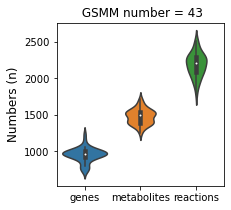

In [471]:
# stats of all xml models
sd = pd.read_csv('./faa/stats.GSMM.csv',index_col=0) # stats data
fig, ax = plt.subplots(1,1,figsize=(3,3))
sns.violinplot(data=sd,ax=ax,fontsize='large')
ax.set_ylabel("Numbers (n)",fontsize='large')
ax.set_title(" GSMM number = {}".format(sd.shape[0]),fontsize='large')
fig.savefig("model.stats.png",dpi=600,bbox_inches='tight')

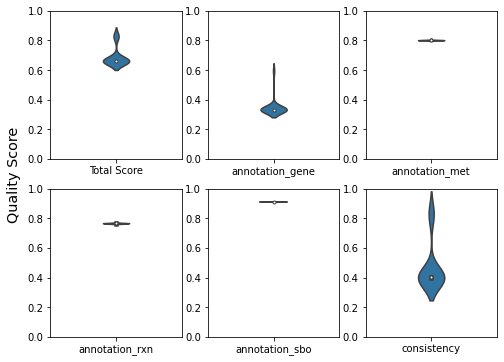

In [546]:
# stats of xml gsmm quality
fig, ax = plt.subplots(2,3,figsize=(8,6))
w = .2
q = pd.read_csv('./faa/quality.csv')
sns.violinplot(data=q,y='total_score',ax=ax[0,0],width=w)
ax[0,0].set_xticklabels(labels=["Total Score"])
ax[0,0].set_ylabel("")
ax[0,0].set_ylim((0,1))
fig.text(0.05,0.5,"Quality Score",rotation=90, va='center',fontsize='x-large')
ql = pd.read_csv('./faa/quality.stack.csv')
gql = ql.groupby("section")

for i,qi in enumerate(gql):
    
    label = qi[0]
    axi=ax[(i+1)//3,(i+1)%3]
    sns.violinplot(data=qi[1],ax=axi,width=w)
    axi.set_xticklabels(labels=[label])
    axi.set_ylim((0,1))
fig.savefig("quality.png",dpi=600,bbox_inches='tight')

In [6]:
# check GSMM model details
p = './faa/solution/'
bin0 = []
acc = []
tet = []
for i in os.scandir(p):
    if "uptake" in i.name:
        temp = pd.read_csv(i.path,index_col=0,skiprows=4)
        temp["C-Flux"] = temp["C-Flux"].str.rstrip('%').astype('float')
        temp = temp.sort_values("C-Flux",ascending=False) # get the top 5 metabolites contributing to
#         print(temp.iloc[:3,2:6])
#         break
        v = temp.index.name.split(" = ")[1]
        if i.name.startswith("bin0"):
            condition = i.name.split(".")[1]
            bin0.append([condition,v])
        elif i.name.lower().startswith("acc"):
            tax, condition = i.name.split(".")[1:3]
            acc.append([tax,condition,v])
        elif i.name.lower().startswith("tet"):
            tax, condition = i.name.split(".")[1:3]
            tet.append([tax,condition,v])
acc = pd.DataFrame(acc,columns=['tax','condition','flux'])
tet = pd.DataFrame(tet,columns=['tax','condition','flux'])
bin0 = pd.DataFrame(bin0,columns=['condition','flux'])
growth = float(bin0.loc[bin0["condition"]=="growth","flux"].values[0]) # flux of bin0 growth
ppk50b = float(bin0.loc[bin0["condition"]=="PPK50_B","flux"].values[0]) # flux of bin0 
ppk50r = float(bin0.loc[bin0["condition"]=="PPK50r","flux"].values[0]) # flux of bin0 
ana = bin0.loc[bin0["condition"]=="ana"]["flux"].astype(float).mean() # flux of bin0 
aer = float(bin0.loc[bin0["condition"]=="aer","flux"].values[0]) # flux of bin0
dictn = {"growth":growth,"PPK50_B":ppk50b,"PPK50r":ppk50r,"ana":ana,"aer":aer}

In [764]:
# model2 = read_sbml_model("./faa/GCF_001050535.1.cds.faa.xml")
# model.reactions.PPK50r

In [7]:
# flux ratio
data = pd.DataFrame() # save the flux under various cases
# add tet
def add_data(tax,data,dictn,name="Acc_"):
    for i in tax.groupby("condition"):
        cond = i[0]
        temp = i[1]
        flux = temp["flux"].astype(float)/dictn[cond]
        flux.name = name+cond
        flux = flux.reset_index(drop=True)
        data = pd.concat([data,flux],axis=1)
    return data
data = add_data(acc,data,dictn)
data = add_data(tet,data,dictn,"Tet_")
data.columns

Index(['Acc_PPK50_B', 'Acc_PPK50r', 'Acc_aer', 'Acc_ana', 'Acc_growth',
       'Tet_PPK50_B', 'Tet_aer', 'Tet_ana', 'Tet_growth'],
      dtype='object')

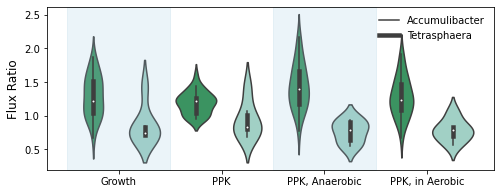

In [107]:
data2 = data.copy()
data2 = data2.drop(['Acc_PPK50r'],axis=1)
data2 = data2.sort_index(axis=1,key=lambda x: x.str[4:],ascending=False)# reset_index(["Acc_growth","Tet_growth","Acc_PPK50_B","Tet_PPK50_B",\
#                           "Acc_ana","Tet_ana","Acc_aer","Tet_aer"],axis=1)
data2 = data2[["Acc_growth","Tet_growth","Acc_PPK50_B","Tet_PPK50_B",\
                          "Acc_ana","Tet_ana","Acc_aer","Tet_aer"]]
fig, ax = plt.subplots(1,1,figsize=(8,3))
sns.violinplot(data=data2,ax=ax,palette=["#2ca25f","#99d8c9","#2ca25f","#99d8c9","#2ca25f","#99d8c9","#2ca25f","#99d8c9",],
              linewidth=1.5,width=.8,label=['Acc','Tet'])
ticks = ax.get_xticks()
step = ticks[1]-ticks[0]
ylim = ax.get_ylim()
ax.set_ylim(ylim)
for i,j in [(0,1),(4,5)]:
    ax.fill_betweenx(np.linspace(ylim[0],ylim[1]),ticks[i]-.5*step,ticks[j]+.5*step,color='#9ecae1',alpha=.2)
ticksnew = [(ticks[i] + ticks[i+1])/2 for i in np.arange(0,len(ticks)-1,2)]
ax.set_xticks(ticksnew)
ax.set_xticklabels(['Growth','PPK','PPK, Anaerobic','PPK, in Aerobic'],ha='center')
ax.set_ylabel("Flux Ratio",fontsize='large')
ax.legend(["Accumulibacter",'Tetrasphaera'],frameon=False)
fig.savefig("flux ratio.png",dpi=600,bbox_inches='tight')

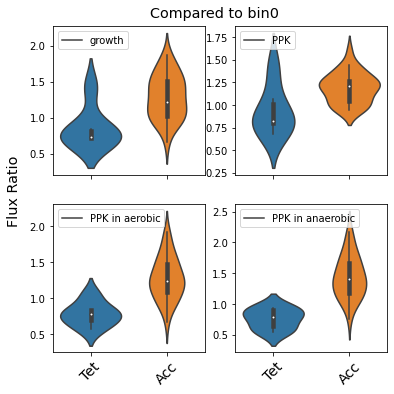

In [8]:
# flux ratio
fig, ax = plt.subplots(2,2,figsize=(6,6))
fig.text(0.02,0.5,"Flux Ratio",fontsize='x-large',va='center',rotation=90)
fig.text(0.5,0.9,"Compared to bin0",fontsize='x-large',ha='center')
sns.violinplot(data=data[["Tet_growth","Acc_growth"]],ax=ax[0,0],legend='growth')
sns.violinplot(data=data[["Tet_PPK50_B","Acc_PPK50_B"]],ax=ax[0,1],legend='PPK')
sns.violinplot(data=data[["Tet_aer","Acc_aer"]],ax=ax[1,0],legend='aerobic')
sns.violinplot(data=data[["Tet_ana","Acc_ana"]],ax=ax[1,1],legend='anaerobic')
le = [['growth'],['PPK'],['PPK in aerobic'],['PPK in anaerobic']]
for i in range(4):
    ax[i//2,i%2].set_xticklabels("")
    ax[i//2,i%2].legend(le[i],loc='upper left')
    if i//2==1:
        ax[i//2,i%2].set_xticklabels(["Tet","Acc"],rotation=45,ha='center',fontsize=14)
fig.savefig("flux ratio.png",dpi=600,bbox_inches='tight')

Current polyP is denoted as "ppi50_c" and involved in two reactions "PPK50_B" GDP+PP50 <-> GTP PPPi and "PPK50r" 47 atp_c + pppi_c <-> 47 adp_c + ppi50_c.

ALso, polyP is denoted as "pppi_c" and involved in four reactions "PPK50_B", "PPK50r" and "PPA2" H2O + pppi_c --> H+ +pi_c + ppi_c (triphosphate, phosphate, diphosphate), and ""

# What polyP-relevant pathway lacked?
metabolites: glc_D_c6, D-glucose 6-phosphate
pap: 47adp_c + pppi_c <-> 47 amp_c + ppi50_c
ppgk: 50glc_D_c + ppi50_c <-> 50 glc_D_c6

# Current model has not methane in it

In [ ]:
# add reactions to the previous model
def add_reaction(model, rl):
    """
    model
    rl: reaction list
    ri: reaction identifier, 'R_3OAS140'
    rn: reaction name, '3 oxoacyl acyl carrier protein synthase n C140 '
    rs: reaction subsystem, 'Cell Envelope Biosynthesis'
    rlb: reaction lower bound
    rub: reaction upper bound
    """
    ri, rn, rs = rl
    reaction = Reaction(ri)
    reaction.name = rn
    reaction.subsystem = 
    reaction.lower_bound = rlb  # This is the default
    reaction.upper_bound = rub  # This is the default


In [164]:
model.reactions.get_by_id("PPK50r").reversibility = False
model.reactions.get_by_id("")

Reaction identifier,PPK50r
Name,Polyphosphate kinase PolyP synthesis
Memory address,0x7fda63e0da60
Stoichiometry,47.0 atp_c + pppi_c <=> 47.0 adp_c + ppi50_c 47.0 ATP C10H12N5O13P3 + Inorganic triphosphate <=> 47.0 ADP C10H12N5O10P2 + Polyphosphate 50
GPR,c_000000000013_030
Lower bound,-1000.0
Upper bound,1000.0


In [123]:
model.reactions.get_by_id("PPK50r")# EX_ppi_e

Reaction identifier,PPK50r
Name,Polyphosphate kinase PolyP synthesis
Memory address,0x7fda63e0da60
Stoichiometry,47.0 atp_c + pppi_c <=> 47.0 adp_c + ppi50_c 47.0 ATP C10H12N5O13P3 + Inorganic triphosphate <=> 47.0 ADP C10H12N5O10P2 + Polyphosphate 50
GPR,c_000000000013_030
Lower bound,-1000.0
Upper bound,1000.0


In [88]:
model.reactions.get_by_id("PPK50r")

Reaction identifier,PPK50r
Name,Polyphosphate kinase PolyP synthesis
Memory address,0x7fda63e0da60
Stoichiometry,47.0 atp_c + pppi_c <=> 47.0 adp_c + ppi50_c 47.0 ATP C10H12N5O13P3 + Inorganic triphosphate <=> 47.0 ADP C10H12N5O10P2 + Polyphosphate 50
GPR,c_000000000013_030
Lower bound,-1000.0
Upper bound,1000.0
